In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np

In [3]:
beer_data=pd.read_csv('/content/drive/MyDrive/Data Sets/beer_data/train.csv')
# beer_data.head()

NameError: name 'pd' is not defined

# Feature Extraction and Feature Engineering
We will remove the irrelevant features from the data set by looking at the number of missing data points in them and number of unique values present in the categorical features.
- Handling the missing data features
- Categorical Features
- review/text feature

Text(0.5, 1.0, '% of missing_data present in each feature')

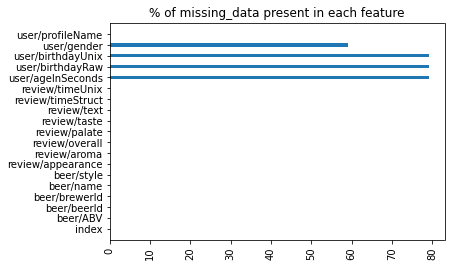

In [ ]:
# remove those features which have missing data more than 50% of data points
missing_data=beer_data.isnull().sum()/len(beer_data)*100
import matplotlib.pyplot as plt
plt.figure()
plt.barh(missing_data.index,missing_data.values,height=0.3)
plt.xticks(rotation=90)
plt.title('% of missing_data present in each feature')

We will remove those columns which have missing values more than 50% of total data points, add these feature in the remove_col list and in the end remove all of them together 

In [ ]:
remove_col=[col for col in beer_data.columns if beer_data[col].isnull().sum()/len(beer_data)*100 > 50]
#remove_col

### Categorical Data
After removing the irrelevant features from the data set we will move forward to handle the Categorical features and extract the relevant information which make the feature more informative and understandable for the ML model.All the features
contains specific number classes in it, but most of them already present in integer or float datatype so these are not our concern, We will only look at those feature which are still present in string or character datatype.

In [ ]:
cat_col=[col for col in beer_data.columns if beer_data[col].dtype=='object']
#beer_data[cat_col].head()

In [ ]:
  #how many unique values each categorical column contains
unique=beer_data[cat_col].nunique()/len(beer_data)*100
#unique

Text(0.5, 1.0, '% of unique values present in Categorical features')

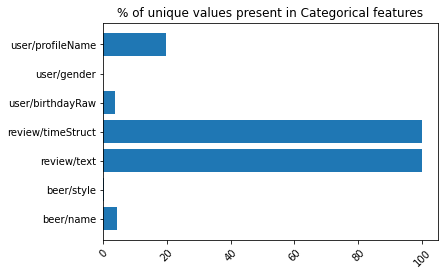

In [ ]:
plt.figure()
plt.barh(unique.index,unique.values)
plt.xticks(rotation=45)
plt.title("% of unique values present in Categorical features")

In [ ]:
# The review/timeStruct seems to be a irrelevant feature so we will remove it
remove_col=remove_col+['review/timeStruct']
beer_data.drop(remove_col,axis=1,inplace=True)

### review/text feature 
This feature seems to be a informative, We divide the review/text into 5 different groups these can be considered as excellent, good, neutral, bad, poor and label them by using Topic Modelling.

In [ ]:
import nltk
beer_data.dropna(inplace=True)
beer_data.reset_index(inplace=True)
text=beer_data['review/text']
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import gensim
from gensim import corpora,models,matutils
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re
exclude = set(string.punctuation)
stopword=set(stopwords.words('english'))
def clean_text(doc):
  text1=[i for i in doc.lower().split() if i not in stopword]
  text2=[i for i in text1 if i not in exclude]
  text3=[w for w in text2 if re.search('^\D',w)]
  text4=[nltk.WordNetLemmatizer().lemmatize(i) for i in text3]
  text5=" ".join([w for (w,pt) in nltk.pos_tag(text4) if pt=='JJ' or pt=='NN' or pt=='VBZ'])
  return text5
clean_text=text.apply(lambda x:clean_text(x))
clean_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0        gold thin white head. nose floral amount spice...
1        bottle snifter. deep ruby red hue finger light...
2        brewpub year get hazy orange-amber finger foam...
3        first thing green bottle glass skunky smell. m...
4        a: pours finger head strong pour, head light l...
                               ...                        
37480    brown longneck freshness dating. sa pint beer ...
37481    bright red maroon-amber hue; minimal light goo...
37482    tap redbones. marzen style beer clear, copper ...
37483    black body brown head thin brown lace. aroma c...
37484    nice sweet, malty complex, smooth drink abv. i...
Name: review/text, Length: 37485, dtype: object

In [2]:
#@title Default title text
dictnry=corpora.Dictionary([t.split() for t in clean_text])
corpus=[dictnry.doc2bow(w.split()) for w in clean_text]
tfidf_cp=models.TfidfModel(corpus,dictionary=dictnry)
lda=gensim.models.ldamodel.LdaModel
LDA=lda(corpus,id2word=dictnry,passes=30,num_topics=2)
LDA.print_topics(num_topics=2,num_words=10)
doc=[w.split() for w in clean_text]
topics=[doc for doc in LDA[corpus]]
beer_data['topics']=pd.Series([max(w,key=lambda x:x[1])[0] for w in topics])

NameError: name 'corpora' is not defined

In [1]:
LDA.print_topics(num_topics=2,num_words=20)

NameError: name 'LDA' is not defined

In [ ]:
beer_data.nunique()

level_0              37485
index                37485
beer/ABV               126
beer/beerId           1731
beer/brewerId          212
beer/name             1688
beer/style              95
review/appearance       10
review/aroma             9
review/overall          10
review/palate            9
review/taste             9
review/text          37477
review/timeUnix      37475
user/profileName      7439
dtype: int64

In [ ]:
# remove some Unwanted columns here
beer_data.drop(['level_0','index','review/text','review/timeUnix','beer/beerId','user/profileName'],inplace=True,axis=1)

In [ ]:
beer_data.info()
#beer_data.nunique()

# Exploratory Data Analysis: Graph and Visuals
We have prepared our dataset completely now we will do some visualization and try extract some insights from the visuals that we going to draw here.


import seaborn as sns
plt.figure()
sns.countplot(hue='review/overall',y='topics',data=beer_data)
plt.xticks(rotation=90)
#Most of the comments or text/reviews belong to rating of 4.0 in the datasets.

plt.figure()
sns.swarmplot(x=beer_data['review/overall'],y=beer_data['comment'])

In [ ]:
#To draw pairplot we extract feature which have unique value less 100
pp_col=[col for col in beer_data.columns if beer_data[col].nunique()<=10]
df_pp=beer_data[pp_col]
df_pp['review_nature']=beer_data['review/overall']>4.0
#we divided the data points on the basis of two classes in review_nature which gives nature of the overall/review 
#whether the review was positive or negative  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


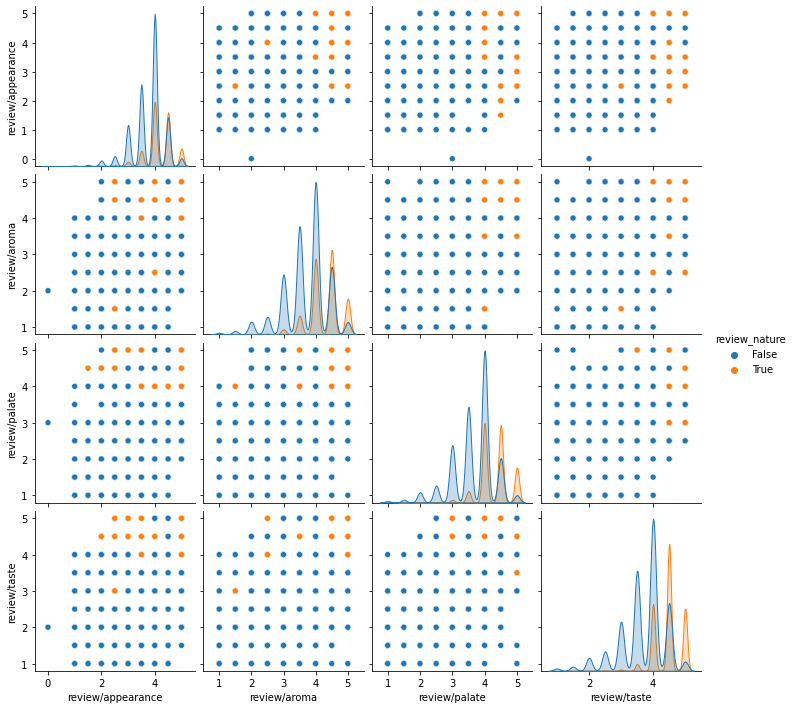

In [ ]:
sns.pairplot(df_pp.drop('review/overall',axis=1),hue='review_nature')

By looking at the pairplot we can see that data points are not overlapping and data points are linearly seperable, so we will try to separate the data points by using linear function or Classifier.

<BarContainer object of 10 artists>

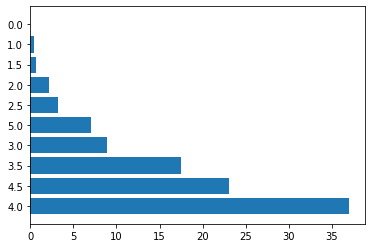

In [ ]:
plt.figure()
plt.barh(beer_data['review/overall'].value_counts().index.astype(str),beer_data['review/overall'].value_counts()/len(beer_data)*100)
# here we can see the Imbalanced data set, 4.0 rating has almost 40% of the sample

# Model Selection
- encoding of categorical variables
- Normalization/Feature Scaling
- Hyperparameter Tuning

In [ ]:
from sklearn.preprocessing import LabelEncoder
y=beer_data['review/overall']
X=beer_data.drop('review/overall',axis=1)
cat_col=[col for col in beer_data.columns if beer_data[col].dtype=='object']
print(cat_col)
encoder=LabelEncoder()
for col in cat_col:
    X[col]=encoder.fit_transform(beer_data[col])

['beer/name', 'beer/style']


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

# New Section

In [ ]:
column=X.columns
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
X_S=pd.DataFrame(scaler.transform(X),columns=column)
X_trainS=pd.DataFrame(scaler.transform(X_train),columns=column)
X_testS=pd.DataFrame(scaler.transform(X_test),columns=column)
X_S.head()

,beer/ABV,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/palate,review/taste
0,0.085069,0.515794,0.218139,0.648936,0.8,0.750,0.750,0.750
1,0.189236,0.014175,0.090694,0.042553,0.8,0.625,0.625,0.500
2,0.079861,0.013095,0.618850,0.148936,0.7,0.750,0.625,0.625
3,0.074653,0.000000,0.695910,0.372340,0.6,0.500,0.500,0.500
4,0.074653,0.050943,0.136337,0.489362,0.8,0.500,0.625,0.375


In [ ]:
# Using Regression model for evaluation
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import cross_validate
model1=LinearRegression()
model2=Ridge()
model3=Lasso()
metric=('r2','neg_mean_squared_error','neg_mean_absolute_error')
cv_score1=pd.Series(cross_validate(model1,X_S,y,scoring=metric,cv=5))
cv_score2=pd.Series(cross_validate(model2,X_S,y,scoring=metric,cv=5))
cv_score3=pd.Series(cross_validate(model3,X_S,y,scoring=metric,cv=5))
Regression_df=pd.DataFrame([cv_score1.apply(lambda x:x.mean()),cv_score2.apply(lambda x:x.mean()),cv_score3.apply(lambda x:x.mean())],index=['Linear Regression','Ridge','Lasso']).drop(['fit_time','score_time'],axis=1)
Regression_df

,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error
Linear Regression,0.669756,-0.161915,-0.305195
Ridge,0.669750,-0.161919,-0.305124
Lasso,-0.000083,-0.490575,-0.522200


In [ ]:
#Using MultiClass Classification Model for evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
model4=LogisticRegression(multi_class='ovr')
model4.fit(X_trainS,y_train.astype(str))
accuracy=accuracy_score(y_test.astype(str),model4.predict(X_testS))
precision=precision_score(y_test.astype(str),model4.predict(X_testS),average='micro')
recall=recall_score(y_test.astype(str),model4.predict(X_testS),average='micro')
f1=f1_score(y_test.astype(str),model4.predict(X_testS),average='micro')
con_matrix=confusion_matrix(y_test.astype(str),model4.predict(X_testS))
#plt.figure()
#sns.heatmap(con_matrix,annot=True)
print('accuracy:{}\nprecision:{}\nrecall:{}\nf1:{}'.format(accuracy,precision,recall,f1))

accuracy:0.4225352112676056
precision:0.4225352112676056
recall:0.4225352112676056
f1:0.4225352112676056


#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
model6=SVC(kernel='rbf')
param_val={'gamma':[0.001,0.01,0.1,1,10],'C':[0.01,0.1,1,10,100]}
grid=GridSearchCV(model6,scoring='accuracy',param_grid=param_val)
grid.fit(X_trainS,y_train.astype(str))

In [ ]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
model5=LogisticRegression(multi_class='ovr')
grid_val={'C':[0.01,0.1,10,50,100,200,500,1000]}
grid=GridSearchCV(model5,param_grid=grid_val,scoring='accuracy')
grid.fit(X_trainS,y_train.astype(str))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='ovr',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 10, 50, 100, 200, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)
accuracy_score(y_test.astype(str),grid.predict(X_testS))

{'C': 500}
0.4205528976412056


0.42477592829705507